![title](img/onemarketdata.png)

# Quickstart Tutorial

# Table of Contents
[Introduction](#intro)

[Prerequisites](#pre)
  * [Preamble](#preamble)

[Running queries](#run_queries)

  * [The run function](#run_function)
  * [Run existing otq files](#run_otq)
  
[Build Graphs via the API](#building)

  * [The EventProcessor type](#basics)
  * [The Graph type](#simple)
  * [Graphs with multiple EventProcessors](#multi)
  * [Multiple outputs from EventProcessors](#multi_output)
  * [Displaying the graph](#display)
  * [EventProcessor pins](#pins)
  * [Labeling an EventProcessor](#labels)  
  * [Utilities for common Graph patterns](#utilities)
    * [Chainlet](#chainlet)
    * [Merge](#merge)
  * [Binding symbols to an EventProcessor](#bind)

[Mulit-stage queries](#staged)
  * [Two-stage query](#two_staged)
  * [N-stage query](#N_staged)
  
[Process data via Callbacks](#callbacks)

<a><a id="intro"></a>
# Introduction
This tutorial is aimed at OneTick users who wish to leverage the **`onetick.query`** Python package for building and running OneTick queries. The package maps OneTick domain contructs directly to both objects and functions allowing for seamless integration with the powerful **`SciPy Stack`**, namely, with the **`NumPy`**, **`Pandas`**, and **`Matplotlib`** modules.

<a><a id="pre"></a>
# Prerequisites
Before reading this tutorial you should already know Python (see the [Python Tutorial](http://docs.python.org/tut/)) and have some familiarlity with OneTick.

If you wish to work with the examples in this tutorial you must also have Python installed and have followed the setup procedures for both of OneTick's **pyomd** and **NumPy_OneTickQuery** modules - instructions for which can be found with your distribution.

<a><a id="preamble"></a>
## Preamble
The following imports will be used for the examples below. This cell must be executed for the cells to compute. The cell also initialises OneTickLib, this shold be done before any processing.

In [1]:
from __future__ import print_function
import onetick.query as otq
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline
pd.set_option('display.width', 200)
lib = otq.OneTickLib(None)

<a><a id="run_queries"></a>
# Running queries
Queries (both existing otq files and objects such as **`onetick.query.Graph`**) can be executed via the **`onetick.query.run`** function, described below. The results returned are determined by the **`output`** parameter. The default value (None) returns a dict of dict of numpy arrays. This mode can be used for querying historic data and is suitable for redirection into Pandas DataFrames. The value 'callback' for the output parameter will return ticks to the callback object specified by the user. This can be useful for streaming results and offers more flexibility on how to direct the output of the query. 

<a><a id="run_function"></a>
# The run function

Existing queries or otq files can be run via a call to **`onetick.query.run`** (the section [Build Graphs via the API](#building) shows how to construct these queries via **`onetick.query.GraphQuery`** objects). By default, data is returned as a SymbolNumpyResultMap object. Both Queries and Graphs can also be processed using callbacks via the **`output`** parameter. This is described in the section [Process data via Callbacks](#callbacks). Here are some heavily used parameters of run method. Note if otput_mode is set to QueryOutputMode.numpy the funciton corresponds to run_numpy, and if otput_mode is QueryOutputMode.callback it corresponds to run_callback

**Parameters**<br>

**query: str, onetick.query.GraphQuery, or onetick.query.ChainQuery**<br>
&nbsp;&nbsp;&nbsp;&nbsp; For running otq files, it represents the path (including filename) to the otq file to run a single query within the file. If more than one query is present, then the query to be run must be specified (i.e., 'path_to_file'/otq_file.otq::query_to_run). Alternatively, a quersive.Graph object can be passed (more below).

**symbols**<br>
&nbsp;&nbsp;&nbsp;&nbsp; (list of) str or (list of) quersive.Symbol object(s) to query
    
**start**<br>
&nbsp;&nbsp;&nbsp;&nbsp; The start time of the query expressed as a datetime object

**end**<br>
&nbsp;&nbsp;&nbsp;&nbsp; The end time of the query expressed as a datetime object

**query_params**<br>
&nbsp;&nbsp;&nbsp;&nbsp; (only used when an otq file is passed as the otq paramter) Parameters for parametrized queries(dictionary(param_name -> param_value)
    
**context**<br>
&nbsp;&nbsp;&nbsp;&nbsp;(defaults to 'DEFAULT') allows specification of different instances of OneTick tick_servers to connect to

**timezone**<br>
&nbsp;&nbsp;&nbsp;&nbsp; The timezone of start and end times
 
**output_mode**<br>
&nbsp;&nbsp;&nbsp;&nbsp; The format of output, enumeration for possible values is QueryOutputMode. (By default return SymbolNumpyResultMap Object)

**apply_times_daily:bool**<br>
&nbsp;&nbsp;&nbsp;&nbsp; run the query for every day in the start_time-end_time range, using the time components of start and end times
    
**treat_byte_arrays_as_strings:bool**<br>
&nbsp;&nbsp;&nbsp;&nbsp; (defaults to True) output byte arrays as strings

**symbol_date**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The symbol date used to look up symbology mapping information in the reference db, expressed as datetime object

**max_concurrency**<br>
&nbsp;&nbsp;&nbsp;&nbsp; The maximum number of CPU cores to use to process the query



<a><a id="run_otq"></a>
# Run existing otq files
Queries contained in otq files created via the query designer, or other means, can be run by passing the path of the file to the **`onetick.query.run`** method. In addition to the path, both the name of the otq file and the name of the query to execute (if more than query is present) must be specified (note that the example query file referenced below is included in the distribution and assumes that OneTick is installed under 'C:\OMD'.):

In [2]:
otq_file='C:/OMD/one_market_data/one_tick/docs/otqs/AGGREGATION_EXAMPLES.otq::VWAP_and_Running_VWAP'
data = otq.run_numpy(otq_file)
pd.DataFrame(data.output('DEMO_L1::AAPL').data).head()

,Time,VWAP
0,2003-12-01 09:35:00,21.109165
1,2003-12-01 09:40:00,21.241901
2,2003-12-01 09:45:00,21.273394
3,2003-12-01 09:50:00,21.360942
4,2003-12-01 09:55:00,21.398247


In [3]:
otq_file='C:/OMD/one_market_data/one_tick/docs/otqs/AGGREGATION_EXAMPLES.otq::VWAP_and_Running_VWAP'
data = otq.run(otq_file,symbols='FULL_DEMO_L1::GS')
pd.DataFrame(data.output('FULL_DEMO_L1::GS').data).head()

,Time,VWAP
0,2003-12-01 09:35:00,96.273924
1,2003-12-01 09:40:00,96.566572
2,2003-12-01 09:45:00,96.688797
3,2003-12-01 09:50:00,96.772654
4,2003-12-01 09:55:00,96.804990


As shown above, an otq file can be run 'as-is', meaning that all of the parameters set in the otq file (i.e., the symbol(s), dates, etc.) are used to execute the query. For example, the above query in the above otq file (distributed with OneTick) performs a VWAP calculation on the symbol 'DEMO_L1::AAPL'. Parameters can be overidden if they are passed to the above function. For example, the same query can be used for a different symbol:

<a><a id="building"></a>
# Build Graphs via the API
<a><a id="basics"></a>
## The EpBase type

The EpBase (EP) is the basic type in the **`onetick.query`** module. It is used to perform all of the analytics in OneTick and can be combined to construct powerful graphs via an intuitive interface. All EPs inherit from a single abstract class:
**`onetick.query.EpBase`**:

### Methods

**`EpBase.sink`**<br>
&nbsp;&nbsp;&nbsp;&nbsp;sink an event processor to this event processor. Returns the sinked EventProcessor

**`EpBase.source`**:<br>
&nbsp;&nbsp;&nbsp;&nbsp;source an event processor to this event processor. Returns the sourced EventProcessor

**`EpBase.__lshift__`**:<br>
&nbsp;&nbsp;&nbsp;&nbsp;overloads the >> operator and equivalent to EventProcessor.sink

**`EpBase.__rshift__`**:<br>
&nbsp;&nbsp;&nbsp;&nbsp;overloads the << operator and equivalent to EventProcessor.source
    
**`EpBase.tick_type`**<br>
&nbsp;&nbsp;&nbsp;&nbsp;set the tick_type of the event processor. Returns self.
        
**`EpBase.node_name`**<br>
&nbsp;&nbsp;&nbsp;&nbsp;name the event processor. Returns self.
            
**`EpBase.symbol`**<br>
&nbsp;&nbsp;&nbsp;&nbsp;bind a symbol to the event processor. Returns self.

**`EventProcessor.__getitem__`**<br>
&nbsp;&nbsp;&nbsp;&nbsp;attach to the output pin of the event processor (i.e., 'if','else') (only available on filter EPs)
        
<br>

All of OneTick's EPs are exposed as python objects in the module. For example, the AddField EP can be instantiated like:


In [4]:
a = otq.AddField()
print(repr(a))
print(type(a))
isinstance(a,otq.EpBase)

AddField(field='',value='')
<class 'onetick.query.ep.eps.AddField'>


True

The above output demonstrates that the call to **`otq.AddField`** returns an object of type **`onetick.query.AddField`** that inherits from the abstract class **`onetick.query.EpBase`**. Each call to an EP with no parameters passed in will populate its attributes with that EP's default values, also shown above.

All of the EP's attributes are listed in its constructor. For example, OneTick's AddField EP signature is:

```python
class AddField(field='',value='')
```

The above signfies that each EP has it's own set of attributes as listed in its constructor and can be accessed in the usual way. For example, once instantiated, the 'field' attribute of the resulting 'AddField' can be accessed and set like:


In [5]:
a = otq.AddField()

print(a)

#set attributes
a.field='New_Field'
a.value = 'New_Value'

print(a.field)
print(a.value)    

ADD_FIELD

New_Field
New_Value


Note that certain 'parameter's of EPs are actually functions that return the **`self`**. For example, the **`tick_type`** and **`node_name`** methods actually return the same AddField object, as shown below. This is useful for "chaining" when building graphs (more below).


In [6]:
a = otq.AddField()

print(a)
b = a.node_name('add_field')
print(a.node_name())
a is b

ADD_FIELD

add_field


True

<a><a id="simple"></a>
## The GraphQuery type

The GraphQuery type represents a collection of EPs.

**`Graph.save_to_file`**:<br>
&nbsp;&nbsp;&nbsp;&nbsp;Save the Graph to an otq file.

**`Graph.render`**:<br>
&nbsp;&nbsp;&nbsp;&nbsp; draw the Graph in the jupyter notebook or to an image, svg, etc.


The below code creates a passthrough, instantiates a Graph object, and runs it via the **`onetick.run`**:

In [7]:
p = otq.Passthrough(fields='PRICE,SIZE,EXCHANGE',go_back_to_first_tick=600).tick_type('TRD')
g = otq.GraphQuery(p)
result=otq.run(g,symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
result

SymbolNumpyResultMap({'FULL_DEMO_L1::GS': {'PASSTHROUGH': ({'Time': array(['2005-01-03T09:31:52.011000', '2005-01-03T09:31:53.008000',
       '2005-01-03T09:31:53.508000', ..., '2005-01-03T15:59:43.664000',
       '2005-01-03T15:59:45.164000', '2005-01-03T15:59:53.164000'],
      dtype='datetime64[us]'), 'PRICE': array([104.9 , 104.9 , 104.9 , ..., 104.85, 104.86, 104.86]), 'SIZE': array([40400,  1200,  1000, ...,  1200,  4900, 10000], dtype=int32), 'EXCHANGE': array(['N', 'T', 'T', ..., 'N', 'N', 'N'], dtype='<U1')}, [])}})

Note that the output of the above is a an SymbolNumpyResultMap object. to get the data for certain symbol we use result.output('symbol').data or result['symbol']. The data is a dictionary from fields name to numpy array of it's values, this allows for easy facilitation of creating a pandas DataFrame object:

In [8]:
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()
# or 
pd.DataFrame(result['FULL_DEMO_L1::GS']).head() # same as the above

,Time,PRICE,SIZE,EXCHANGE
0,2005-01-03 09:31:52.011,104.9,40400,N
1,2005-01-03 09:31:53.008,104.9,1200,T
2,2005-01-03 09:31:53.508,104.9,1000,T
3,2005-01-03 09:31:53.511,104.9,100,T
4,2005-01-03 09:31:53.515,104.9,200,T


<a><a id="multi"></a>
## Graphs with multiple EventProcessors

Graphs can be constructed by sinking or sourcing EPs to one another. To filter the above results on PRICE, for example, sink a where_clause:

In [9]:
where = otq.WhereClause(where='PRICE > 105')
p = otq.Passthrough().tick_type('TRD')
p.sink(where)
g = otq.Graph(where)
result = otq.run(g,symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()

,Time,PRICE,SEQ_NUM,DELETED_TIME,SIZE,CORR,COND,TICK_STATUS,STOP_STOCK,SOURCE,EXCHANGE,TICKER,OMDSEQ
0,2005-01-03 09:35:52.659,105.05,1971504952659752,1969-12-31 19:00:00,1500,0,,0,N,C,N,G,0
1,2005-01-03 09:35:56.661,105.05,1971504956661036,1969-12-31 19:00:00,200,0,E,0,N,C,N,G,0
2,2005-01-03 09:35:58.660,105.08,1971504958660452,1969-12-31 19:00:00,500,0,E,0,N,C,N,G,0
3,2005-01-03 09:36:00.661,105.08,1971504960661857,1969-12-31 19:00:00,100,0,,0,N,C,N,G,0
4,2005-01-03 09:36:01.161,105.07,1971504961161477,1969-12-31 19:00:00,100,0,,0,N,C,N,G,0


EPs support chaining sinks and sources, so that separate calls to sink or source can occur simultaneously. For example, the above example can be chained like:

In [10]:
where = otq.WhereClause(where='PRICE > 105')
p = otq.Passthrough().tick_type('TRD')
p.sink(where).sink(otq.Table(fields='PRICE,SIZE,EXCHANGE'))
g = otq.Graph(p)
result = otq.run(g,symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()

,Time,PRICE,SIZE,EXCHANGE
0,2005-01-03 09:35:52.659,105.05,1500,N
1,2005-01-03 09:35:56.661,105.05,200,N
2,2005-01-03 09:35:58.660,105.08,500,N
3,2005-01-03 09:36:00.661,105.08,100,N
4,2005-01-03 09:36:01.161,105.07,100,N


Sinking or sourcing can result in overly verbose code, expecially if chaining calls. The above can be achieved instead via operators in place of the 'sink' or 'source' methods:

In [11]:
query = otq.Passthrough().tick_type('TRD') >> otq.WhereClause(where='PRICE > 105') >> otq.Table(fields='PRICE,SIZE,EXCHANGE')
g = otq.Graph(query)
result = otq.run(g,symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).set_index(['Time']).head()

,PRICE,SIZE,EXCHANGE
Time,,,
2005-01-03 09:35:52.659,105.05,1500,N
2005-01-03 09:35:56.661,105.05,200,N
2005-01-03 09:35:58.660,105.08,500,N
2005-01-03 09:36:00.661,105.08,100,N
2005-01-03 09:36:01.161,105.07,100,N


Sourcing the where_clause can be easily achieved as well:

In [12]:
query = otq.Passthrough().tick_type('TRD') << otq.WhereClause(where='PRICE > 105')
result = otq.run(otq.Graph(query),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()

,Time,PRICE,SEQ_NUM,DELETED_TIME,SIZE,CORR,COND,TICK_STATUS,STOP_STOCK,SOURCE,EXCHANGE,TICKER,OMDSEQ
0,2005-01-03 09:35:52.659,105.05,1971504952659752,1969-12-31 19:00:00,1500,0,,0,N,C,N,G,0
1,2005-01-03 09:35:56.661,105.05,1971504956661036,1969-12-31 19:00:00,200,0,E,0,N,C,N,G,0
2,2005-01-03 09:35:58.660,105.08,1971504958660452,1969-12-31 19:00:00,500,0,E,0,N,C,N,G,0
3,2005-01-03 09:36:00.661,105.08,1971504960661857,1969-12-31 19:00:00,100,0,,0,N,C,N,G,0
4,2005-01-03 09:36:01.161,105.07,1971504961161477,1969-12-31 19:00:00,100,0,,0,N,C,N,G,0


<a><a id="multi_output"></a>
## Multiple outputs from EventProcessors
By default, only leaf-nodes (defined as those EPs that do not have any sinks and are not sourced by any other EP) automatically output data from the graph. In all of the examples thus far, only a single leaf node is present. Any EP, however, can output data if node_name method is called with always_output_data=True parameter. If there are multiple outputs the node_name sould be specified via the result.output method or to the [] operator. The below example outputs from both EPs:

In [13]:
graph = otq.Passthrough(fields='PRICE').tick_type('TRD').node_name('pass', always_output_data=True) >>\
otq.WhereClause(where='PRICE>10').node_name('where', always_output_data=True)
g = otq.Graph(graph)
g.start_time(datetime(2005,1,3,9,30))
g.end_time(datetime(2005,1,3,16))
result = otq.run(g,symbols='FULL_DEMO_L1::GS')
output_from_pass = result.output('FULL_DEMO_L1::GS', node_name='pass')
output_from_where = result.output('FULL_DEMO_L1::GS', node_name='where')

#print the output
print(output_from_pass.name)
print(output_from_pass.error)
print(output_from_pass.data)
print(result['FULL_DEMO_L1::GS', 'pass']) #same as the above line

pass
None
{'Time': array(['2005-01-03T09:31:52.011000', '2005-01-03T09:31:53.008000',
       '2005-01-03T09:31:53.508000', ..., '2005-01-03T15:59:43.664000',
       '2005-01-03T15:59:45.164000', '2005-01-03T15:59:53.164000'],
      dtype='datetime64[us]'), 'PRICE': array([104.9 , 104.9 , 104.9 , ..., 104.85, 104.86, 104.86])}
{'Time': array(['2005-01-03T09:31:52.011000', '2005-01-03T09:31:53.008000',
       '2005-01-03T09:31:53.508000', ..., '2005-01-03T15:59:43.664000',
       '2005-01-03T15:59:45.164000', '2005-01-03T15:59:53.164000'],
      dtype='datetime64[us]'), 'PRICE': array([104.9 , 104.9 , 104.9 , ..., 104.85, 104.86, 104.86])}


<a><a id="display"></a>
## Displaying the graph
Sometimes it is convenient to visualize the graph being constructed, especially for more complex graphs with several-to-many EPs. **`onetick.query`** leverages the **`graphviz`** module to render the graph. A call to **`onetick.query.Graph.render`** will render the graph. If this method is called inside of a jupyter notebook it will be displayed in the output cell by default. The parameter **`format`** allows other types of renderings, including a 'png', 'svg', 'pdf' formats and others; the parameter **`verbose`** allows for all information (i.e., parameters, tick_type, symbols, etc.) to be displayed. The **`graphviz`** application must be installed, as well as pip installed (i.e., pip install graphviz or conda install graphviz). The cells below demonstrate some simple renderings of the previous filtered examples:

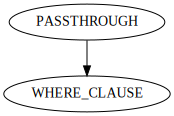

In [14]:
g.render()

Now display the graph verbosely:

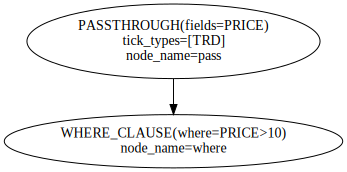

In [15]:
g.render(verbose=True)

<a><a id="pins"></a>
## EventProcessor pins
In the above example, the passthrough EP was sinked or sourced to the 'IF' pin of the Where_Clause EP, by default. To attach to the 'Else' pin, the [] operator of the EP object is called, below. In the example below, prices are filtered by `PRICE < 105` since the Passthrough EP is sourcing the 'else' pin.


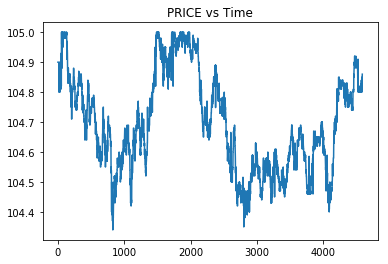

,Time,PRICE,SIZE,EXCHANGE
0,2005-01-03 09:31:52.011,104.9,40400,N
1,2005-01-03 09:31:53.008,104.9,1200,T
2,2005-01-03 09:31:53.508,104.9,1000,T
3,2005-01-03 09:31:53.511,104.9,100,T
4,2005-01-03 09:31:53.515,104.9,200,T


In [16]:
wc = otq.Passthrough(fields='PRICE,SIZE,EXCHANGE').tick_type('TRD') >> otq.WhereClause(where='PRICE > 105')
query = wc['ELSE'] >> otq.Passthrough()
result = otq.run(otq.Graph(query),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
df = pd.DataFrame(result.output('FULL_DEMO_L1::GS').data)
df['PRICE'].plot(title='PRICE vs Time')
plt.show()
df.head()

<a><a id="labels"></a>
## Labeling an EventProcessor

Labeling an EP is necessary when an EP needs to distinguish between mulitiple sources. For example, several of the parameters to the JOIN_BY_TIME EP require that join's input EPs are labelled. For example LEADING_SOURCES is a parameter that asks which input is preserved unchanged in the JOIN_BY_TIME's output. This is achieved by labeling the input EPs:

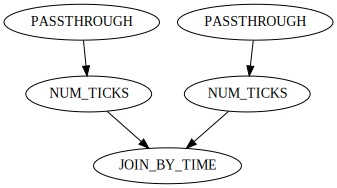

,,t.TIMESTAMP,t.PRICE,t.SEQ_NUM,t.DELETED_TIME,t.SIZE,t.CORR,t.COND,t.TICK_STATUS,t.STOP_STOCK,t.SOURCE,...,q.ASK_EXCHANGE,q.BID_EXCHANGE,q.NBBO_IND,q.NASDAQ_BBO_IND,q.SOURCE,q.TICK_STATUS,q.EXCHANGE,q.TICKER,q.OMDSEQ,q.TICK_ID
Time,t.OMDSEQ,,,,,,,,,,,,,,,,,,,,,
2005-01-03 09:31:52.011,0,2005-01-03 09:31:52.011,104.9,1971504712011575,1969-12-31 19:00:00,40400,0,,0,N,C,...,C,C,0,0,C,0,C,G,5,9.0
2005-01-03 09:31:53.008,0,2005-01-03 09:31:53.008,104.9,1971504713008187,1969-12-31 19:00:00,1200,0,,0,N,C,...,T,T,0,0,C,0,T,G,15,25.0
2005-01-03 09:31:53.508,0,2005-01-03 09:31:53.508,104.9,1971504713508334,1969-12-31 19:00:00,1000,0,,0,N,C,...,T,T,0,0,C,0,T,G,15,25.0
2005-01-03 09:31:53.511,0,2005-01-03 09:31:53.511,104.9,1971504713511894,1969-12-31 19:00:00,100,0,,0,N,C,...,T,T,0,0,C,0,T,G,15,25.0
2005-01-03 09:31:53.515,0,2005-01-03 09:31:53.515,104.9,1971504713515182,1969-12-31 19:00:00,200,0,,0,N,C,...,T,T,0,0,C,0,T,G,15,25.0


In [17]:
trds = otq.Passthrough().tick_type('TRD')
qtes = otq.Passthrough().tick_type('QTE')
nticks = otq.NumTicks(is_running_aggr=True,output_field_name='TICK_ID')

g = otq.Graph(trds >> nticks.node_name('t') >> otq.JoinByTime(leading_sources='t') << nticks.copy().node_name('q') << qtes)
g.render()
data = otq.run(g,symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
df=pd.DataFrame(data.output('FULL_DEMO_L1::GS').data)
df.set_index(['Time','t.OMDSEQ'],inplace=True)
df.head()

<a><a id="utilities"></a>
## Utilities for common Graph patterns

Several patterns appear very frequently when building Graphs. Below we describe several utilities for builing single chain graphs, joining graphs, and merging graphs.

<a><a id="chainlet"></a>
## Chainlet
Most (simple) graphs consist of EPs connected in a singly-linked chain. We refer to such a graph as a Chainlet. A Chainlet is an object that acts as a collection for EPs that constitute a singly linked Chain. Instead of continually sinking such EPs together, a Chainlet object can be created to make this structure more visible. For example, the following singly-linked chain can be sinked together like:

In [18]:
g = otq.Graph(otq.Passthrough().tick_type('TRD') >> otq.WhereClause(where='PRICE>105') >> otq.Table(fields='PRICE'))
result=otq.run(g, symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()

,Time,PRICE
0,2005-01-03 09:35:52.659,105.05
1,2005-01-03 09:35:56.661,105.05
2,2005-01-03 09:35:58.660,105.08
3,2005-01-03 09:36:00.661,105.08
4,2005-01-03 09:36:01.161,105.07


The above example is a linear chain where all EPs are sinked together. In fact, most of the examples in this tutorial are of this type. Since this is a recurring theme a convenience function is available to construct it. **`otq.Chainlet`** is an object that accepts a list of EPs and builds a singly-linked graph (chainlet) and returns the the last ep to allow for further chaining:

In [19]:
chain = otq.Chainlet(otq.Passthrough().tick_type('TRD'),otq.WhereClause(where='PRICE>105'),otq.Table(fields='PRICE'))
result=otq.run(otq.Graph(chain), symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()

,Time,PRICE
0,2005-01-03 09:35:52.659,105.05
1,2005-01-03 09:35:56.661,105.05
2,2005-01-03 09:35:58.660,105.08
3,2005-01-03 09:36:00.661,105.08
4,2005-01-03 09:36:01.161,105.07


Chainlets also allow sinking of additional EPs and act like a 'macro' EP. For example, the above Chainlet can sink another EP like:

In [20]:
chain += otq.AddField(field='DUMMY',value='"Dummy"')  # acts like chain = chain >> otq.AddField(...)
result=otq.run(otq.Graph(chain), symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()

,Time,PRICE,DUMMY
0,2005-01-03 09:35:52.659,105.05,Dummy
1,2005-01-03 09:35:56.661,105.05,Dummy
2,2005-01-03 09:35:58.660,105.08,Dummy
3,2005-01-03 09:36:00.661,105.08,Dummy
4,2005-01-03 09:36:01.161,105.07,Dummy


<a><a id="merge"></a>
## Merge
Same as Join, but instead of JoinByTime Merge EP is used

Merging multiple time series data into one stream is also a common operation. The utility function 'merge' allows for multiple Chainlets to be merged together via a function call, similar to the 'jon' function. For example:

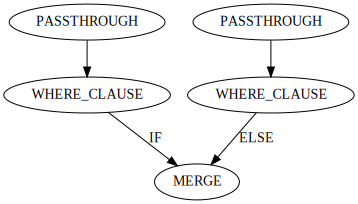

,Time,PRICE,SYMBOL_NAME,TICK_TYPE,SIZE
0,2005-01-03 09:31:52.011,104.9,FULL_DEMO_L1::GS,TRD,0
1,2005-01-03 09:31:52.011,0.0,FULL_DEMO_L1::GS,TRD,40400
2,2005-01-03 09:31:53.008,104.9,FULL_DEMO_L1::GS,TRD,0
3,2005-01-03 09:31:53.008,0.0,FULL_DEMO_L1::GS,TRD,1200
4,2005-01-03 09:31:53.508,104.9,FULL_DEMO_L1::GS,TRD,0


In [21]:
branch1 = otq.Chainlet(otq.Passthrough(fields="PRICE"),otq.WhereClause(where="PRICE>10").tick_type("TRD"))
branch2 = otq.Chainlet(otq.Passthrough(fields="SIZE"),otq.WhereClause(where="SIZE<10").tick_type("TRD"))

mergeEp = otq.merge([branch1["IF"], branch2["ELSE"]])

g = otq.Graph(mergeEp).start_time(datetime(2005,1,3,9,30)).end_time(datetime(2005,1,3,16))
g.render()
result=otq.run(g, symbols='FULL_DEMO_L1::GS')
pd.DataFrame(result.output('FULL_DEMO_L1::GS').data).head()

<a><a id="attach"></a>
## Attach
This is general version of Merge and Join, where the joining EP is specified by the user.
The same join by time operation can be implemented as:

In [22]:
c1, c2, c3 = otq.Passthrough(), otq.Chainlet(otq.Passthrough()), otq.Passthrough() #the component to join
join_by_time = otq.attach([c1, c2, c3], otq.JoinByTime())

<a><a id="bind"></a>
## Binding symbols to an EventProcessor

Symbols can be directly bound to an EP via the **`symbol`** method on the EP instead of passing it as an unbound symbol. For example, to compute the top N highest symbols by volume (see the notebook **`Top N Players by Volume`** for a detailed, step-by-step example):

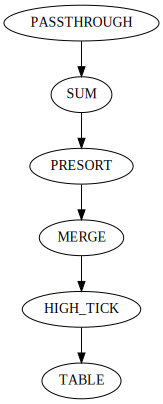

SymbolNumpyResultMap({'': {'TABLE': ({'Time': array(['2006-06-01T16:00:00.000000', '2006-06-01T16:00:00.000000',
       '2006-06-01T16:00:00.000000', '2006-06-01T16:00:00.000000',
       '2006-06-01T16:00:00.000000'], dtype='datetime64[us]'), 'VOLUME': array([72284527., 51306585., 12754200., 10807700.,  6934500.]), 'SYMBOL_NAME': array(['FULL_DEMO_L1::MSFT', 'FULL_DEMO_L1::CSCO', 'FULL_DEMO_L1::C',
       'FULL_DEMO_L1::VZ', 'FULL_DEMO_L1::AA'], dtype='<U40')}, [])}})

In [23]:
num_of_top_ticks = 5
db='FULL_DEMO_L1'
symbols='A,AA,AAA,C,CSCO,MSFT,IBM,GS,MS,VZ'

# create graph with EPs
chain = otq.Chainlet(otq.Passthrough(fields='SIZE').tick_type('TRD'),
                     otq.Sum(output_field_name='VOLUME',input_field_name='SIZE'),
                     otq.Presort().symbols(['{}::{}'.format(db,x) for x in symbols.split(',')]),
                     otq.Merge(),
                     otq.HighTick(num_ticks=num_of_top_ticks,input_field_name='VOLUME'),
                     otq.Table(fields='VOLUME,SYMBOL_NAME')
                    )
graph=otq.Graph(chain)
graph.render()

#process the graph
data = otq.run(graph,symbols=None,start=datetime(2006,6,1,9,30), end=datetime(2006,6,1,16))
data

<a><a id="staged"></a>
# Multi-stage queries
The results of previously executed queries (sub-queries) can be used as input to the next query; any number of sub-queries can be used as such. Each sub-query produces the list of symbols to use in the next (sub-) query. For example, it is possible to create a query that will return the number of ticks for every option for each stock that is a part of the specified index. For such a query, an input symbol would be the name of the index, the first sub-query would return the names of all stocks for this symbol, the second sub-query would return the names of all options for each stock name returned by the first sub-query, and the final sub-query would return the number of ticks for every option name returned by the second sub-query. In OneTick, such sub-queries are called stages and the complete query is called a multi-stage query.

Stage 1 queries are queries that generate symbol lists. This can be as simple as reading a **.csv** file or as complex as looking at DBs to calculate symbols lists. Stage 2 queries are queries that analyze the actual data per symbol.

Each stage of the multi-stage query, except the very last, must return a field called SYMBOL_NAME. The values in this field would be symbol names to use in the next stage.

<a><a id="two_staged"></a>
## Two-stage queries
Below is a simple example to get all symbols who have a total volume over 1000 traded over a single trading day. The first query (stage 1) gets all of the symbols in a particular database. The second query, stage 2, reads in the input produced from the first stage and outputs all symbols with total volume > 1000.

In [24]:
db = 'DEMO_L1::'
stage1_graph = otq.Graph(otq.FindDbSymbols(pattern='%').tick_type('TRD'))
symbols=otq.run(stage1_graph,symbols=db,start=datetime(2003,12,1),end=datetime(2015,12,15))
pd.DataFrame(symbols.output(db).data).head()

,Time,SYMBOL_NAME
0,2003-12-01,DEMO_L1::A
1,2003-12-01,DEMO_L1::AA
2,2003-12-01,DEMO_L1::AAA
3,2003-12-01,DEMO_L1::AABC
4,2003-12-01,DEMO_L1::AAC


Now we can run the second query. Note that the output from the previous query is used as input to the next query, below (i.e., as a binded symbol list to the **merge** EP):

In [25]:
stage2_graph = otq.Graph(otq.NumTicks().tick_type('TRD') >> otq.Merge().symbols(symbols) >> otq.ValueCompare(field='VALUE',value=1000))
db_list = otq.run(stage2_graph, symbols=None, start=datetime(2003,12,1,9,30), end=datetime(2015,12,15,16))
db_list

SymbolNumpyResultMap({'': {'VALUE_COMPARE': ({'Time': array(['2015-12-15T16:00:00.000000', '2015-12-15T16:00:00.000000',
       '2015-12-15T16:00:00.000000', '2015-12-15T16:00:00.000000',
       '2015-12-15T16:00:00.000000', '2015-12-15T16:00:00.000000'],
      dtype='datetime64[us]'), 'VALUE': array([ 2942.,  4612.,  1955.,  1317., 13066.,  1458.]), 'SYMBOL_NAME': array(['DEMO_L1::A', 'DEMO_L1::AA', 'DEMO_L1::AAI', 'DEMO_L1::AAII',
       'DEMO_L1::AAPL', 'DEMO_L1::ABAX'], dtype='<U40'), 'TICK_TYPE': array(['TRD', 'TRD', 'TRD', 'TRD', 'TRD', 'TRD'], dtype='<U20')}, [])}})

<a><a id="N_staged"></a>
## N-stage queries
Continuing to use the results from the previous queries.

In [26]:
graph = otq.Graph(otq.Sum(output_field_name='TOTAL').tick_type('TRD'))
num_dbs = otq.run(graph, symbols=db_list, start=datetime(2003,12,1,9,30), end=datetime(2015,12,15,16))

<a><a id="callbacks"></a>
## Process data via Callbacks

In [27]:
class PrintingCallback(otq.CallbackBase):
    def __init__(self):
        otq.CallbackBase.__init__(self)
        self.timezone = 'GMT'

    def replicate(self):
        return PrintingCallback()

    def process_tick_descriptor(self, desc):
        pass

    def process_callback_label(self, callback_label):
        print('callback_label: ' + callback_label)

    def process_symbol_name(self, symbol_name):
        print('symbol_name is:' + symbol_name)

    def process_symbol_group_name(self, symbol_group_name):
        print('symbol_group_name is: ' + symbol_group_name)

    def process_tick_type(self, tick_type):
        print('tick_type is: ' + tick_type)

    def process_tick(self, tick, time):
        print(tick)
        
    def process_sorting_order(self, sorted_by_time_flag):
        print('sorted_by_time_flag is: ' + sorted_by_time_flag)

    def process_data_quality_change(self, symbol_name, data_quality, time):
        print('data_quality for symbol' + symbol_name + 'is: ' + symbol_name)

    def done(self):
        print('done!')

    def process_error(self, error_code, error_msg):
        print('error' + error_code + error_msg)
 

In [28]:
otq_file='C:/OMD/one_market_data/one_tick/docs/otqs/AGGREGATION_EXAMPLES.otq::VWAP_and_Running_VWAP'
cb = PrintingCallback()
otq.run(otq_file, output_mode = otq.QueryOutputMode.callback, callback = cb)

callback_label: VWAP_and_Running_VWAP
symbol_name is:DEMO_L1::AAPL
tick_type is: TRD
{'VWAP': (21.10916547572647,)}
{'VWAP': (21.241901188389317,)}
{'VWAP': (21.27339434096939,)}
{'VWAP': (21.36094167430092,)}
{'VWAP': (21.398246799946488,)}
{'VWAP': (21.398887614634983,)}
{'VWAP': (21.564771864031925,)}
{'VWAP': (21.588941115412673,)}
{'VWAP': (21.61411565130069,)}
{'VWAP': (21.58715466811227,)}
{'VWAP': (21.451906163032994,)}
{'VWAP': (21.408748948710876,)}
{'VWAP': (21.37585927455084,)}
{'VWAP': (21.382338927023113,)}
{'VWAP': (21.40528219622768,)}
{'VWAP': (21.39951634328959,)}
{'VWAP': (21.335007002536056,)}
{'VWAP': (21.321265790049537,)}
{'VWAP': (21.350907209382544,)}
{'VWAP': (21.35966114619792,)}
{'VWAP': (21.367405829656015,)}
{'VWAP': (21.371952228674967,)}
{'VWAP': (21.404432000682196,)}
{'VWAP': (21.499241083785193,)}
{'VWAP': (21.553830716417163,)}
{'VWAP': (21.595595420614412,)}
{'VWAP': (21.58787756907855,)}
{'VWAP': (21.56855712487764,)}
{'VWAP': (21.537465810045827,)

Callback does not have to implement every of this methods, it can only impement what it needs,
but do not forget to override replicate method if your callback has fields that are modified over time.

In [29]:
class CountingCallback(otq.CallbackBase):
    def __init__(self):
        otq.CallbackBase.__init__(self)
        self.num_processed_ticks = 0

    def replicate(self):
        new = CountingCallback()
        new.num_processed_ticks = self.num_processed_ticks
        return new

    def process_tick(self, tick, time):
        self.num_processed_ticks += 1
        
    def done(self):
        print('done! Number of processed ticks is: {}'.format(self.num_processed_ticks))
        

In [30]:
otq_file='C:/OMD/one_market_data/one_tick/docs/otqs/AGGREGATION_EXAMPLES.otq::VWAP_and_Running_VWAP'
cb = CountingCallback()
otq.run(otq_file, output_mode = otq.QueryOutputMode.callback, callback = cb)

done! Number of processed ticks is: 78
